Load the dataset into the program and show a sample of the Pokemon images being classified.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import pprint
import random

Categories: 5


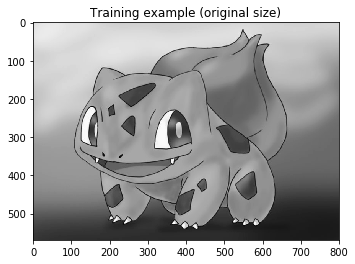

Original Size = (569, 800)


In [17]:
# Example folder contains Abra, Aerodactyl, and Alakazam
DATADIR = '/Users/ericnunn/Desktop/SeattleU/Courses/CPSC5305/Pokemon Classifier/dataset/'

# all categories of Pokemon to train on
CATEGORIES = ['Bulbasaur', 'Charmander', 'Mewtwo', 'Pikachu', 'Squirtle'] # FIXME - Change to 'list of all directory names' so the Pokemon categories can change fluidly
print('Categories:', len(CATEGORIES))

# Get filepath of training data
path = os.path.join(DATADIR, CATEGORIES[0])

# Read in one image from the filepath
img = cv2.imread(os.path.join(path, os.listdir(path)[1]), cv2.IMREAD_GRAYSCALE) # rgb colors are read in different order

# Plot the image
plt.title('Training example (original size)')
plt.imshow(img, cmap='gray')
plt.show()
print('Original Size =', img.shape)

Each image has unique dimensions. The neural network assumes all training data has the same dimensions so this means we will need to reshape the data before we can train on it.

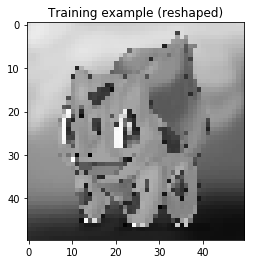

New Size = (569, 800)


In [18]:
IMG_SIZE = 50

new_array = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
plt.title('Training example (reshaped)')
plt.imshow(new_array, cmap='gray')
plt.show()
print('New Size =', img.shape)

Now we need to reshape all of our data so every image is the same size. Let's load in all of our data, reshape it, and add it to our list of training data. (This may take several seconds.)

In [25]:
# list of standardized training images
training_data = []

# Reshapes image files and stores the training data, ready for training
def create_training_data():
    # Loop through each category in training data
    for category in CATEGORIES:
        # path to pokemon dir
        path = os.path.join(DATADIR, category)
        # Training label for this category of images
        class_num = CATEGORIES.index(category)
        # Load each image and reshape it
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) # Converts data to greyscale to cut down on computation time needed
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except:
                pass

create_training_data()

In [26]:
print(len(training_data))

1469


In [50]:
# shuffle dataset so the algorithm doesn't learn the Pokemon type based on order of appearance
random.shuffle(training_data)

In [51]:
# Training data
X = []
y = []

In [52]:
for features, label in training_data:
    X.append(features)
    y.append(label)

# Reshape training data for 
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

In [53]:
import pickle

# Save feature data
pickle_out = open('pickle_data/X_train.pickle', 'wb')
pickle.dump(X, pickle_out)
pickle_out.close()

# Save label data
pickle_out = open('pickle_data/y_train.pickle', 'wb')
pickle.dump(y, pickle_out)
pickle_out.close()

In [ ]:
# Verify that data was saved correctly (optional)
pickle_in = open('X_train.pickle', 'rb')
X = pickle.load(pickle_in)
pickle_in.close()